#  A cool SYNTH - bits, pieces and some demos

## Components

### Signal generators

#### SINE (freq)

#### NOISE (white)

#### RECT (period, duty cycle)
#### SAWTOOTH (width)
#### TRIANGLE (width)


### Envelopes
#### Exponential growth
#### Exponential decay
#### lin ADSR (attack delay sustain release)
#### exp ADSR (attack delay sustain release)


### Filters

#### LP / HP / BP / BN - ORDER [IIR?]

### LFO (low frequency oscillation)

In [373]:
# Import relevant packages
import numpy as np
import scipy.signal as signal
import matplotlib.pylab as plt
from scipy.io.wavfile import write
import copy
from IPython.display import Audio, display

# And some parameters
fs = 44100
T = 5


In [374]:
# Some function definitions

# freq, duation_s, fs
def sine(f, T, fs):
    s = np.sin(2*f*np.pi*np.arange(0,T, 1/fs))
    return s

# duty cycle, periodicity, duration, fs
def rect(duty, per, T, fs):
    r = np.zeros(int(T*fs))
    idx_increment = per*fs
    idx_on = 0
    while idx_on < T*fs:
        r[idx_on:idx_on+int((duty*idx_increment))-1] = 1
        idx_on += int(idx_increment)
    return r

# periodicity, period, fs
def sawtooth(per, T, fs):
    s = np.zeros(int(T*fs))
    idx_increment = int(per*fs)
    idx_start = 0
    idx_half_increment = int(np.floor(idx_increment/2))
    while (idx_start + idx_increment) < T*fs:
        idx_half = idx_start+idx_half_increment
        idx_stop = idx_start + idx_increment
        s[idx_start:idx_half+1] = np.arange(0,idx_half-idx_start+1)/idx_half_increment
        s[idx_half+1:idx_stop] = np.flip(np.arange(0, idx_stop-(idx_half+1))/idx_half_increment) 
        idx_start = idx_stop+1
    return s

# periodicity, diration, fs
def triangle(per, T, fs):
    t = np.zeros(T*fs)
    idx_increment = int(per*fs)
    idx_start = 0
    while (idx_start + idx_increment) < T*fs:
        idx_stop = idx_start + idx_increment
        t[idx_start:idx_stop+1] = np.arange(0, idx_increment+1)/idx_increment 
        idx_start = idx_stop+1
    return t

# duration, fs
def noise(T, fs):
    n = np.random.normal(0,1,int(fs*T))
    return n
    
# signal, scramble width
def sample_scramble(sig, width):
    idx_start = 0
    idx_end = width
    while (idx_start+width) < len(sig):
        np.random.shuffle(sig[idx_start:idx_end])
        idx_start = idx_end + 1
        idx_end = idx_start + width
    return 

# signal, onset fraction (of signal length)
def exp_onset(sig, onset_frac):
    sig_length = int(len(sig))
    print(sig_length)
    onset_length = int(np.fix(sig_length*onset_frac))
    # Create exponential window and normalize
    w = np.exp(np.linspace(0,1,onset_length))-1
    w = w / (np.e-1)
    sig_on = np.concatenate([w, np.ones(sig_length-onset_length)])
    return sig_on

# signal, offset fraction (of signal length)
def exp_offset(sig, offset_frac):
    sig_length = int(len(sig))
    print(sig_length)
    offset_length = int(np.fix(sig_length*offset_frac))
    # Create exponential window and normalize
    w = np.exp(np.linspace(0,1,offset_length))-1
    w = w / (np.e-1)
    sig_off = np.concatenate([np.ones(sig_length-offset_length), np.flip(w)])
    return sig_off

# signal, attack time (fraction), decay time (fraction), sustain level (re max), release time (fraction)
def lin_adsr(sig, att, dec, sus, rel):
    if (att + dec + rel) > 1:
        print("Attack + release + decay time longer than signal - aborting")
        return 0
    
    sig_length = int(len(sig))
    att_length = int(np.fix(sig_length*att))
    dec_length = int(np.fix(sig_length*dec))
    sus_length = int(np.fix(sig_length*sus))
    rel_length = int(np.fix(sig_length*rel))
    w = np.concatenate([np.linspace(0,1,att_length), np.linspace(1,sus,dec_length), sus*np.ones(sig_length-att_length-dec_length-rel_length), np.linspace(sus,0,att_length)])
    return w

# signal, attack time (fraction), decay time (fraction), sustain level (re max), release time (fraction)
def exp_adsr(sig, att, dec, sus, rel):
    if (att + dec + rel) > 1:
        print("Attack + release + decay time longer than signal - aborting")
        return 0
    
    sig_length = int(len(sig))
    att_length = int(np.fix(sig_length*att))
    dec_length = int(np.fix(sig_length*dec))
    sus_length = int(np.fix(sig_length*sus))
    rel_length = int(np.fix(sig_length*rel))
    
    # elements
    a = (np.exp(np.linspace(0,1,att_length))-1)/(np.e-1)
    d = np.flip((np.exp(np.linspace(0,1,dec_length))-1))/(np.e-1)*(1-sus)+sus
    s = sus*np.ones(sig_length-att_length-dec_length-rel_length)
    r = np.flip((np.exp(np.linspace(0,1,rel_length))-1))/(np.e-1)*sus

    w = np.concatenate([a, d, s, r])

    return w

# Helper function for wav export
def normalize4wav(sig):
    amplitude = np.iinfo(np.int16).max
    sig = sig/np.max(sig)*amplitude
    return sig


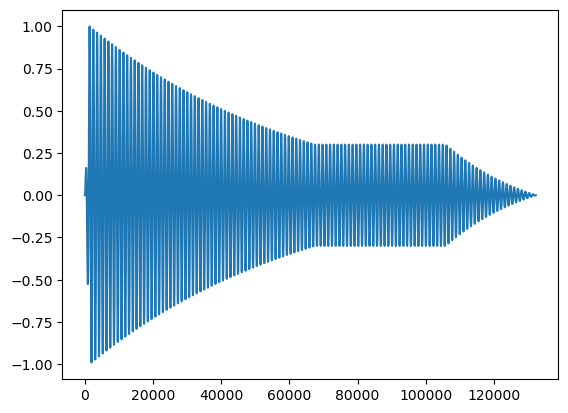

In [375]:
# some debugging


#sine_freq = 5
#s = sine(sine_freq, T, fs)
#plt.plot(s)


#rect_duty = .1
#rect_per = 10e-3
#r = rect(rect_duty, rect_per, T, fs)
#r_scale = normalize4wav(r)
#plt.plot(r)
#fname = ('../../wav/rect_duty' + str(rect_duty) + '_rect_per' + str(rect_per) + '.wav')
#write(fname, fs, np.int16(r_scale))


# sawtooth
#saw_per = 100e-3
#saw = sawtooth(saw_per, T, fs)
#saw_scale = normalize4wav(saw)
#plt.plot(saw)
#fname = ('../../wav/saw_per' + str(saw_per) + '.wav')
#write(fname, fs, np.int16(saw_scale))


# triangle
#tri_per = 1e-3
#tri = triangle(tri_per, T, fs)
#tri_scale = normalize4wav(tri)
#plt.plot(tri)
#fname = ('../../wav/tri_per' + str(tri_per) + '.wav')
#write(fname, fs, np.int16(tri_scale))


# noise
#n = noise(T, fs)
#n_scale = normalize4wav(n)
#plt.plot(n)
#fname = ('../../wav/n_dur' + str(T) + '.wav')
#write(fname, fs, np.int16(n_scale))


# sample_scramble
#s = sine(500,3,44100)
#scramble_width = 4
#sp = copy.copy(s)
#sample_scramble(sp, scramble_width)
#sample_scramble_scale =  normalize4wav(sp)
#plt.plot(s[1:100])
#plt.plot(sp[1:100])
#fname = ('../../wav/scrambled_' + str(scramble_width) + '.wav')
#write(fname, fs, np.int16(sample_scramble_scale))


# exponental on/offset window
#s = sine(500,3,44100)
#sw =exp_onset(s, 0.2)
#so = exp_offset(sw,.1)
#plt.plot(s*sw*so)

# adsr
# s = sine(500,3,44100)
T= 3
s = sine(40, T, 44100)
#s = sawtooth(1e-3, T, fs)
#s_adsr = lin_adsr(s, .1, .4, .8, .1)
s_adsr = s * exp_adsr(s, .01, .5, .3, .2)
plt.plot(s_adsr)
display(Audio(data = s_adsr, rate = 44100))


ts = np.concatenate([s_adsr, s_adsr, s_adsr, s_adsr])
display(Audio(data = ts, rate = 44100))

